In [1]:
# 0. BASE SET UP
# ----------------------------------------------------------------------------------
import pandas as pd

# Set max columns and rows
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Import data and split intro training and test sets
cust_churn_df = pd.read_csv('data/cust-churn-data-full.csv', low_memory=False)

# Remove duplicated columns (indicated by suffix) from joining SQL tables 
# dup_cols = [col for col in cust_churn_df.columns if '.' in col]
# print(f"Duplicated columns: {dup_cols}")
cust_churn_df = cust_churn_df.drop(['account_id.1', 'customer_id.1', 'customer_id.2', 'zip_code.1'], axis=1)

# Remove columns that hold information only received in future or gives away the churn_label
eda_cust_churn_df = cust_churn_df.drop(['status', 'churn_category', 'churn_reason'], axis=1)

print("\nColumn names:", eda_cust_churn_df.columns)
print("\nShape of dataset:", eda_cust_churn_df.shape)
print("\nMissing values:", eda_cust_churn_df.isnull().sum())


Column names: Index(['account_id', 'customer_id', 'tenure_months', 'num_referrals',
       'has_internet_service', 'internet_type', 'has_unlimited_data',
       'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support',
       'has_online_security', 'has_online_backup', 'has_device_protection',
       'contract_type', 'paperless_billing', 'payment_method',
       'avg_long_distance_fee_monthly', 'total_long_distance_fee',
       'avg_gb_download_monthly', 'stream_tv', 'stream_movie', 'stream_music',
       'total_monthly_fee', 'total_charges_quarter', 'total_refunds',
       'churn_label', 'area_id', 'zip_code', 'city', 'latitude', 'longitude',
       'population', 'gender', 'age', 'senior_citizen', 'married',
       'num_dependents'],
      dtype='object')

Shape of dataset: (7043, 37)

Missing values: account_id                          0
customer_id                         0
tenure_months                       0
num_referrals                       0
has_internet_service

In [2]:
print("\nColumn names:", eda_cust_churn_df.columns)
print("\nShape of dataset:", eda_cust_churn_df.shape) #Shape of dataset: (7043, 40)
print("\nMissing values:", eda_cust_churn_df.isnull().sum())


Column names: Index(['account_id', 'customer_id', 'tenure_months', 'num_referrals',
       'has_internet_service', 'internet_type', 'has_unlimited_data',
       'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support',
       'has_online_security', 'has_online_backup', 'has_device_protection',
       'contract_type', 'paperless_billing', 'payment_method',
       'avg_long_distance_fee_monthly', 'total_long_distance_fee',
       'avg_gb_download_monthly', 'stream_tv', 'stream_movie', 'stream_music',
       'total_monthly_fee', 'total_charges_quarter', 'total_refunds',
       'churn_label', 'area_id', 'zip_code', 'city', 'latitude', 'longitude',
       'population', 'gender', 'age', 'senior_citizen', 'married',
       'num_dependents'],
      dtype='object')

Shape of dataset: (7043, 37)

Missing values: account_id                          0
customer_id                         0
tenure_months                       0
num_referrals                       0
has_internet_service

In [3]:
eda_cust_churn_df.head()
# eda_cust_churn_df.describe()

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,churn_label,area_id,zip_code,city,latitude,longitude,population,gender,age,senior_citizen,married,num_dependents
0,BFIN-DLMOA,0013-EXCHZ,3,3,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,7.38,22.14,11,Yes,No,No,83.90,267.40,0.0,Yes,607,93010,Camarillo,34.227846,-119.079903,42853,Female,75,Yes,Yes,0
1,AFEO-XOOCP,0014-BMAQU,63,8,Yes,Fiber Optic,No,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,12.96,816.48,7,No,No,No,84.65,5377.80,0.0,No,963,94558,Napa,38.489789,-122.270110,63947,Male,52,No,Yes,0
2,DEMQ-MFXWC,0016-QLJIS,65,3,Yes,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,28.46,1849.90,14,Yes,Yes,Yes,90.45,5957.90,0.0,No,1390,95681,Sheridan,38.984756,-121.345074,1219,Female,43,No,Yes,1
3,AIPP-VTDXJ,0019-EFAEP,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,2.25,162.00,16,Yes,No,No,101.30,7261.25,0.0,No,303,91942,La Mesa,32.782501,-117.016110,24005,Female,32,No,No,0
4,CJHA-SRKIB,0019-GFNTW,56,0,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,0.00,0.00,19,No,No,No,45.05,2560.10,0.0,No,716,93441,Los Olivos,34.704340,-120.026090,1317,Female,39,No,No,0


In [4]:
# Loop through all columns and print value counts for each
for column in eda_cust_churn_df.columns:
    print(f"Value counts for column '{column}':")
    print(cust_churn_df[column].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for column 'account_id':
account_id
BFIN-DLMOA    1
NEWT-UTTDQ    1
GVEE-PDLRR    1
ZFLT-FYMEG    1
CSIJ-CHRDZ    1
             ..
DHEB-RFPIB    1
QHMM-FEKOR    1
UYYN-GDJUL    1
LGZP-LIBGE    1
PCTD-RXANG    1
Name: count, Length: 7043, dtype: int64

----------------------------------------

Value counts for column 'customer_id':
customer_id
0013-EXCHZ    1
3587-PMCOY    1
5780-INQIK    1
5707-ORNDZ    1
5288-AHOUP    1
             ..
8198-RKSZG    1
8050-WYBND    1
8033-ATFAS    1
7996-BPXHY    1
9992-UJOEL    1
Name: count, Length: 7043, dtype: int64

----------------------------------------

Value counts for column 'tenure_months':
tenure_months
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
10    127
8     123
9     119
70    119
12    117
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
52     80
56     80
64     80
25     79
26     

In [5]:
print("\nMissing values:", cust_churn_df.isnull().sum())


Missing values: account_id                          0
customer_id                         0
tenure_months                       0
num_referrals                       0
has_internet_service                0
internet_type                    1526
has_unlimited_data                  0
has_phone_service                   0
has_multiple_lines                  0
has_premium_tech_support            0
has_online_security                 0
has_online_backup                   0
has_device_protection               0
contract_type                       0
paperless_billing                   0
payment_method                      0
avg_long_distance_fee_monthly       0
total_long_distance_fee             0
avg_gb_download_monthly             0
stream_tv                           0
stream_movie                        0
stream_music                        0
total_monthly_fee                   0
total_charges_quarter               0
total_refunds                       0
status                           

In [6]:
# 1. DATA CLEANING
# ----------------------------------------------------------------------------------
def clean_data_r1(df):
    """
    Cleans the dataset by:
    - Splitting 'account_id' and 'customer_id' into parts and dropping the original columns
    - Converting 'cust_id_p1' to integer
    - Converting 'zip_code' and 'area_id' columns to string
    - Filling missing values with a placeholder value
    - Dropping rows with missing 'churn_label'
    - Automatically converting 'Yes'/'No' columns to binary (1/0)
    
    Parameters:
    - df: DataFrame containing the raw data
    
    Returns:
    - df: Cleaned DataFrame
    """
    # Split account_id into two parts
    df[['acc_id_p1', 'acc_id_p2']] = df['account_id'].str.split('-', expand=True)
    df.drop(['account_id'], axis=1, inplace=True)

    # Split customer_id into two parts
    df[['cust_id_p1', 'cust_id_p2']] = df['customer_id'].str.split('-', expand=True)
    df.drop(['customer_id'], axis=1, inplace=True)

    # Convert 'cust_id_p1' to integer to determine if there is a correlation between time of subscription with telecomm and churn label - predict loyalty level
    df['cust_id_p1'] = df['cust_id_p1'].astype(int)

    # Convert both 'zip_code' and 'area_id' columns to string (more meaningful)
    df[['zip_code', 'area_id']] = df[['zip_code', 'area_id']].astype(str)

    # Fill missing values with a placeholder value
    df['internet_type'].fillna('Unknown', inplace=True)

    # Drop missing churn_label rows - in total from test and train sets there are 52 out of 7042 rows ~0.738% of all values
    df.dropna(subset=['churn_label'], inplace=True)

    # Automatically convert 'Yes'/'No' columns to 1/0
    for column in df.select_dtypes(include=['object']).columns:
        if df[column].isin(['Yes', 'No']).all():
            df[column] = df[column].map({'Yes': 1, 'No': 0})

    # Convert 'female'/'male' to binary column
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
    # df['gender'] = df['gender'].str.lower().map({'female': 0, 'male': 1}) # use this if there is a mix of upper and lower case

    # Return the cleaned dataframe
    return df

# Apply the function to both train and test sets
clean_cust_churn_df = clean_data_r1(eda_cust_churn_df)

In [7]:
clean_cust_churn_df.head()

,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,churn_label,area_id,zip_code,city,latitude,longitude,population,gender,age,senior_citizen,married,num_dependents,acc_id_p1,acc_id_p2,cust_id_p1,cust_id_p2
0,3,3,1,Fiber Optic,1,1,0,1,0,0,0,Month-to-Month,1,Credit Card,7.38,22.14,11,1,0,0,83.90,267.40,0.0,1,607,93010,Camarillo,34.227846,-119.079903,42853,0,75,1,1,0,BFIN,DLMOA,13,EXCHZ
1,63,8,1,Fiber Optic,0,1,1,1,1,0,0,Two Year,1,Credit Card,12.96,816.48,7,0,0,0,84.65,5377.80,0.0,0,963,94558,Napa,38.489789,-122.270110,63947,1,52,0,1,0,AFEO,XOOCP,14,BMAQU
2,65,3,1,Cable,1,1,1,1,1,1,1,Two Year,1,Credit Card,28.46,1849.90,14,1,1,1,90.45,5957.90,0.0,0,1390,95681,Sheridan,38.984756,-121.345074,1219,0,43,0,1,1,DEMQ,MFXWC,16,QLJIS
3,72,0,1,Fiber Optic,1,1,1,0,1,1,1,Two Year,1,Bank Withdrawal,2.25,162.00,16,1,0,0,101.30,7261.25,0.0,0,303,91942,La Mesa,32.782501,-117.016110,24005,0,32,0,0,0,AIPP,VTDXJ,19,EFAEP
4,56,0,1,DSL,1,0,0,1,1,1,1,Two Year,0,Bank Withdrawal,0.00,0.00,19,0,0,0,45.05,2560.10,0.0,0,716,93441,Los Olivos,34.704340,-120.026090,1317,0,39,0,0,0,CJHA,SRKIB,19,GFNTW


In [8]:
from sklearn.model_selection import train_test_split

# Function to split train_df and test_df into X and y
def split_features_target(df, target_column='churn_label', test_size=0.3, random_state=0):
    """
    Splits the dataframe into features (X) and target (y) for both train and test datasets.
    
    Parameters:
    - df: DataFrame containing the full data (features + target)
    - target_column: Name of the target column (default is 'churn_label')
    - test_size: Fraction of the data to be used for testing (default is 0.3)
    - random_state: Random seed for reproducibility (default is 0)
    
    Returns
    - X_train: Features for the training set
    - X_test: Features for the test set
    - y_train: Target for the training set
    - y_test: Target for the test set
    """
    # Separate the target (y) and features (X)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

# Splitting the train_df and test_df and capturing the results
X_train, X_test, y_train, y_test = split_features_target(clean_cust_churn_df)

# Checking the output
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4893, 38)
y_train shape: (4893,)
X_test shape: (2098, 38)
y_test shape: (2098,)


In [9]:
# Base catboost model without feature engineering
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics

cat_ft_0 = list((clean_cust_churn_df.select_dtypes(include=['object', 'category']).columns))
# ['internet_type', 'contract_type', 'payment_method', 'churn_category', 'churn_reason', 'area_id', 'zip_code', 'city', 'gender', 'acc_id_p1', 'acc_id_p2', 'cust_id_p2']

# Instantiate the CatBoostClassifier and specify categorical features
cb0_model = CatBoostClassifier(
    iterations=1000,          # Number of boosting iterations
    learning_rate=0.1,        # Step size shrinkage
    depth=6,                  # Depth of the tree
    random_seed=5,            # Ensures reproducibility
    verbose=100,              # Prints progress every 100 iterations
    cat_features=cat_ft_0  # Specify which features are categorical
)

# Fit the model with the training data
cb0_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cb0_model.predict(X_test)

# Calculate the accuracy score
cb0_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy_score for baseline catboost_model with no feature engineering: ', cb0_accuracy)

print(classification_report(y_test, y_pred))
cb0_auc_score = roc_auc_score(y_test, cb0_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {cb0_auc_score}')

0:	learn: 0.6221470	total: 63.2ms	remaining: 1m 3s
100:	learn: 0.2509080	total: 617ms	remaining: 5.49s
200:	learn: 0.1959766	total: 1.19s	remaining: 4.74s
300:	learn: 0.1550987	total: 1.76s	remaining: 4.1s
400:	learn: 0.1262034	total: 2.33s	remaining: 3.48s
500:	learn: 0.1023682	total: 2.91s	remaining: 2.9s
600:	learn: 0.0836579	total: 3.48s	remaining: 2.31s
700:	learn: 0.0701040	total: 4.04s	remaining: 1.73s
800:	learn: 0.0580646	total: 4.61s	remaining: 1.14s
900:	learn: 0.0495316	total: 5.18s	remaining: 569ms
999:	learn: 0.0424430	total: 5.75s	remaining: 0us

Accuracy_score for baseline catboost_model with no feature engineering:  0.8465204957102002
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1536
           1       0.75      0.65      0.69       562

    accuracy                           0.85      2098
   macro avg       0.81      0.78      0.80      2098
weighted avg       0.84      0.85      0.84      2098

ROC AUC: 0.90

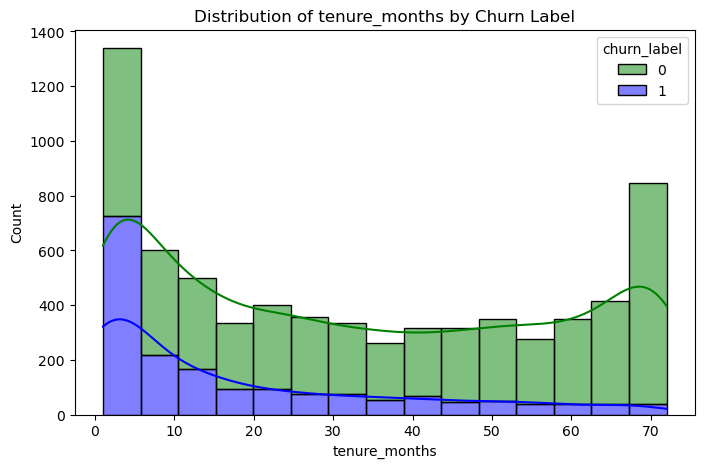

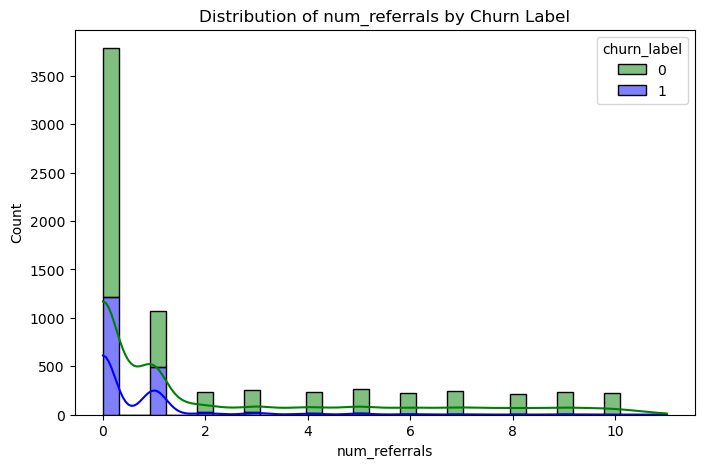

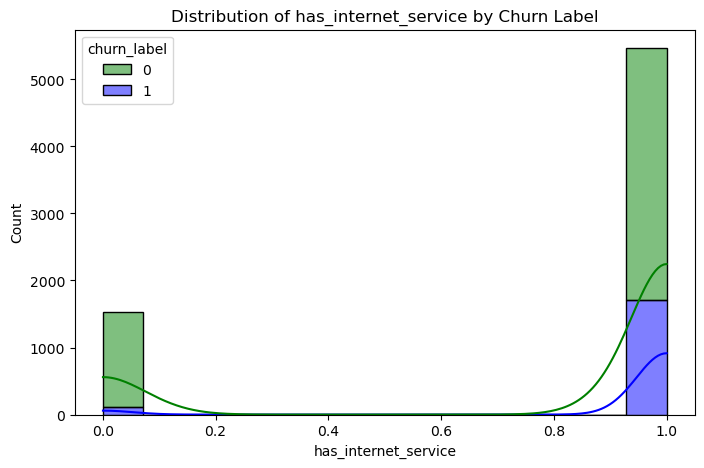

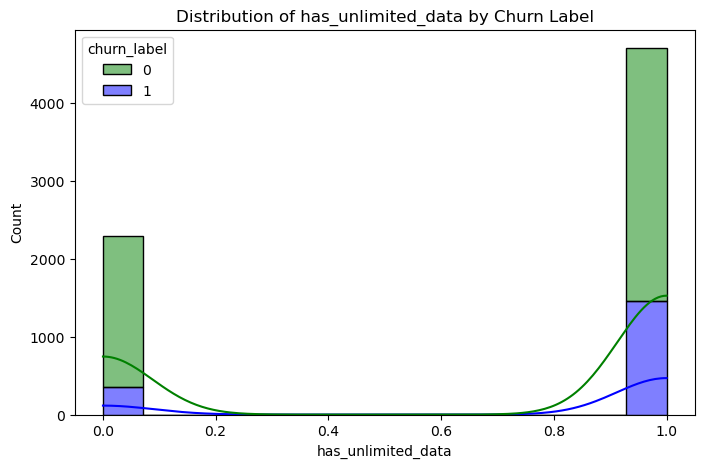

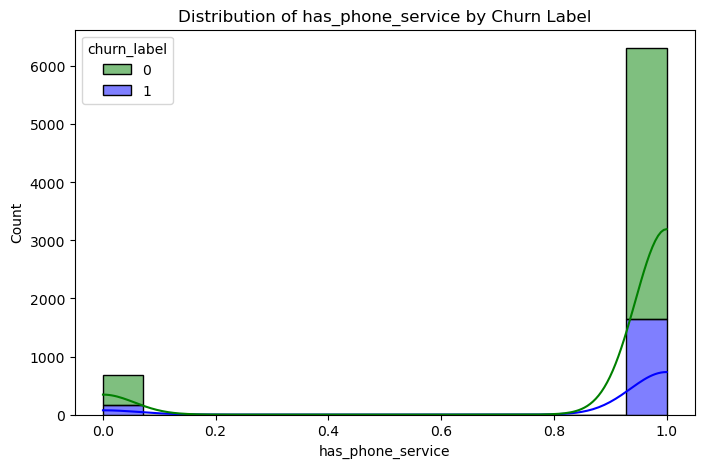

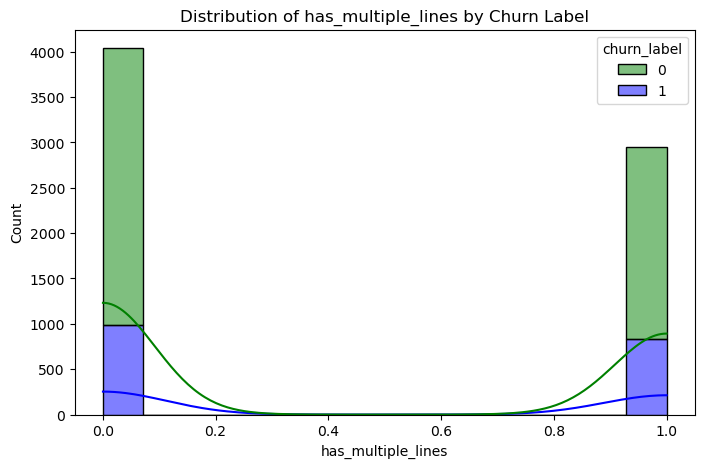

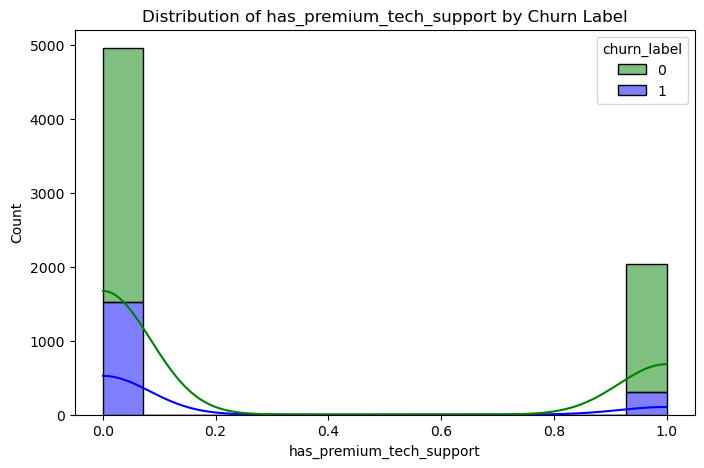

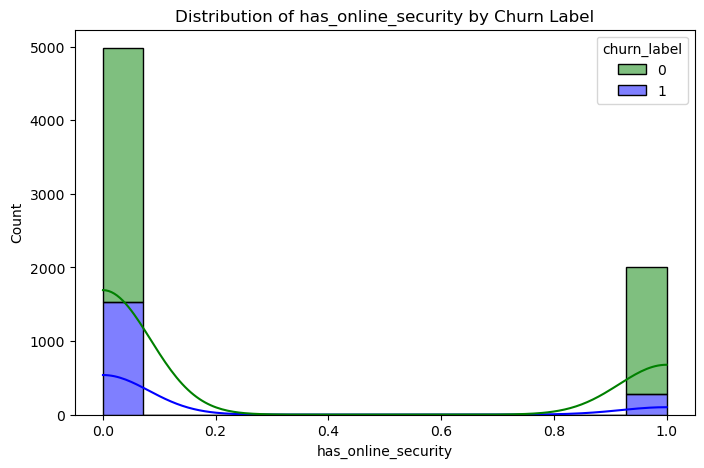

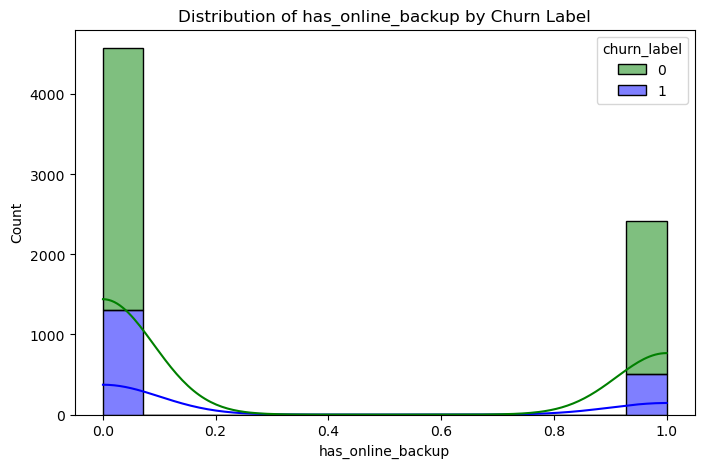

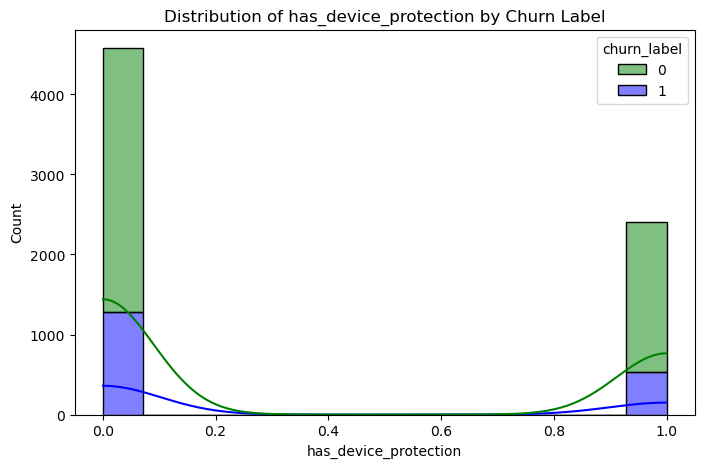

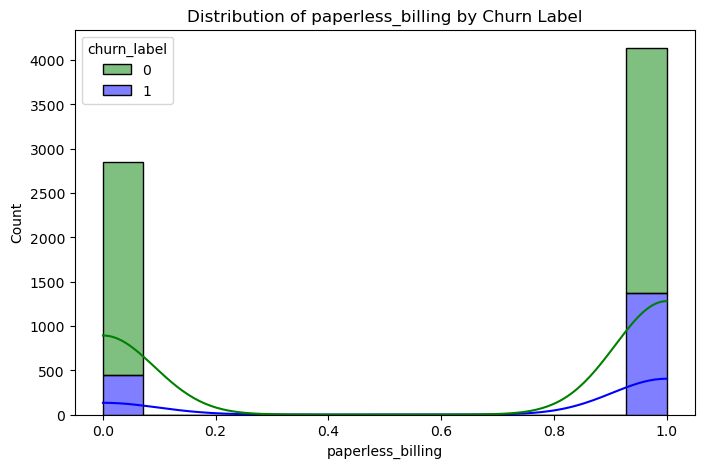

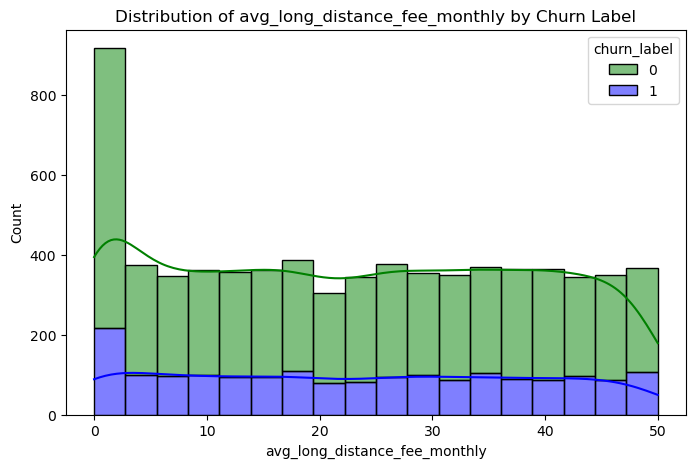

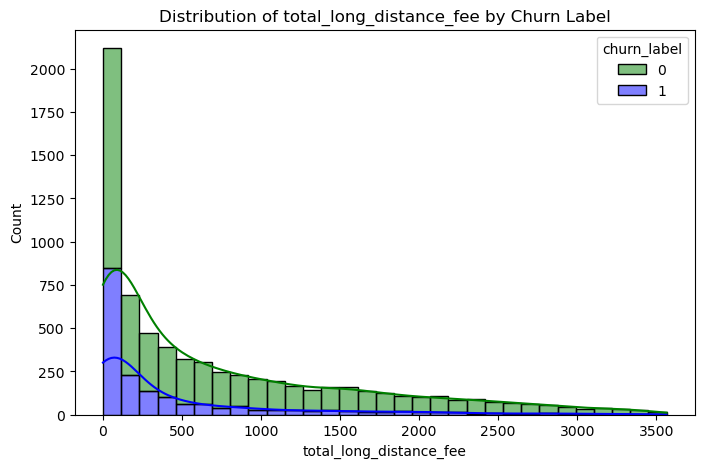

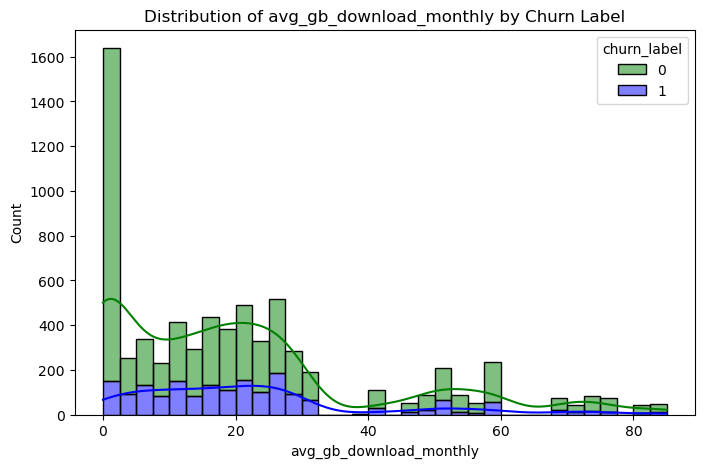

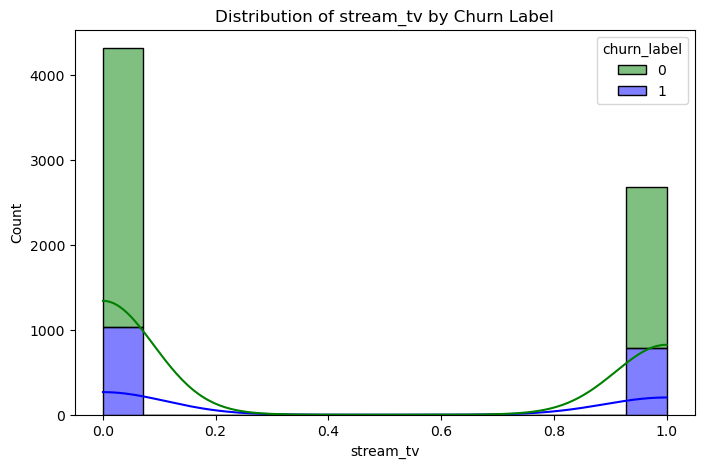

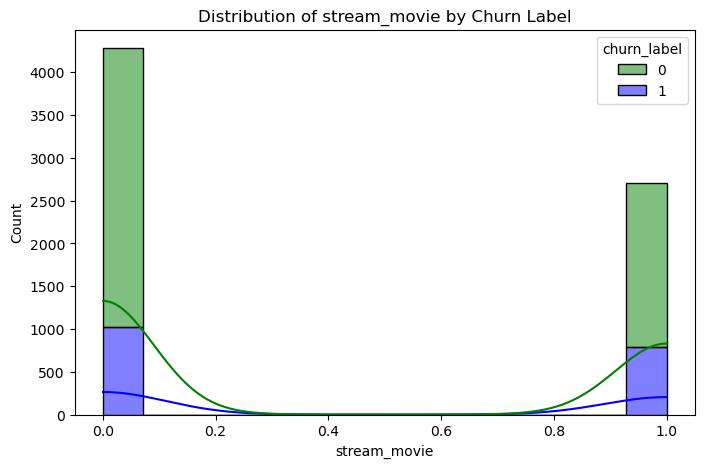

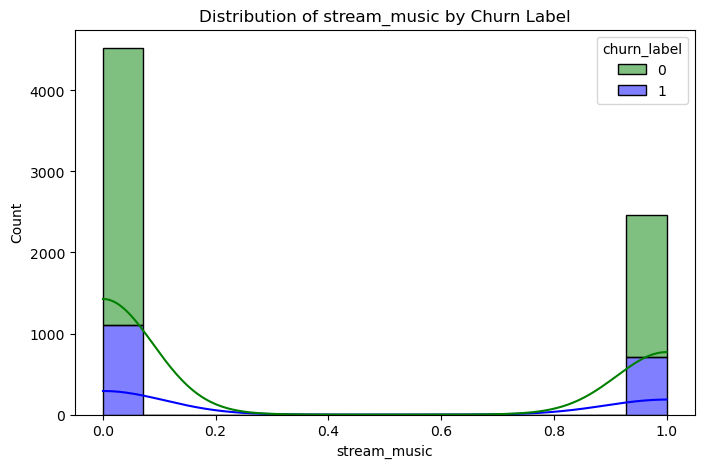

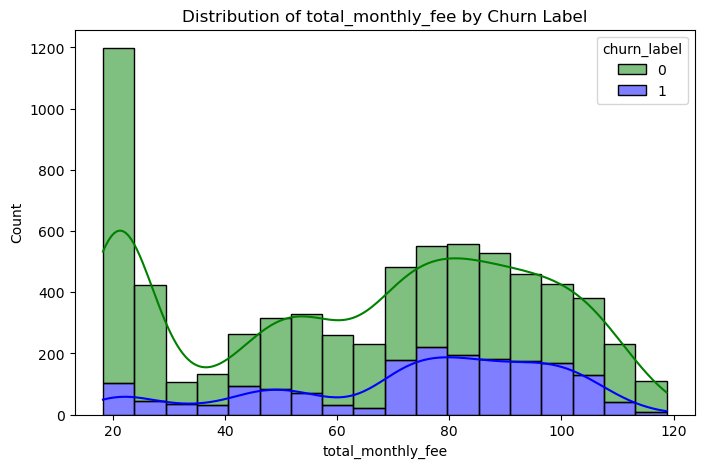

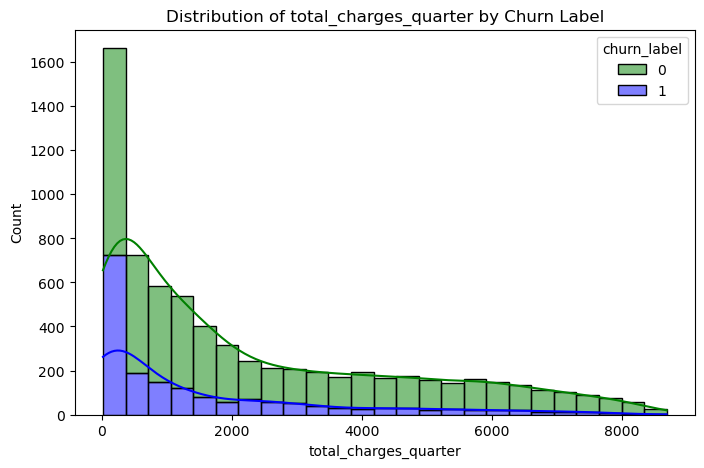

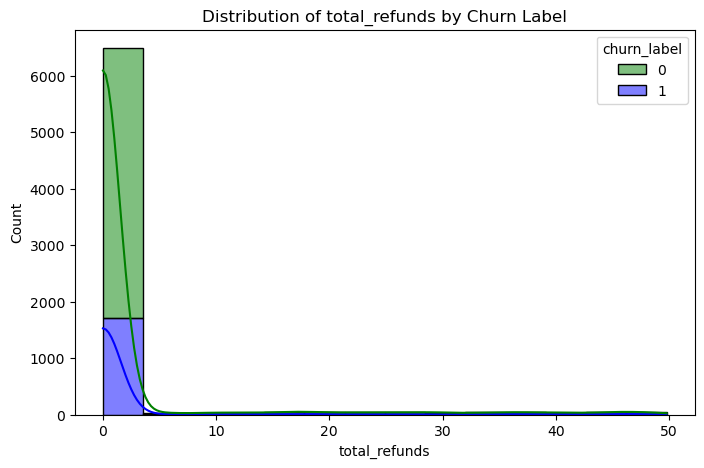

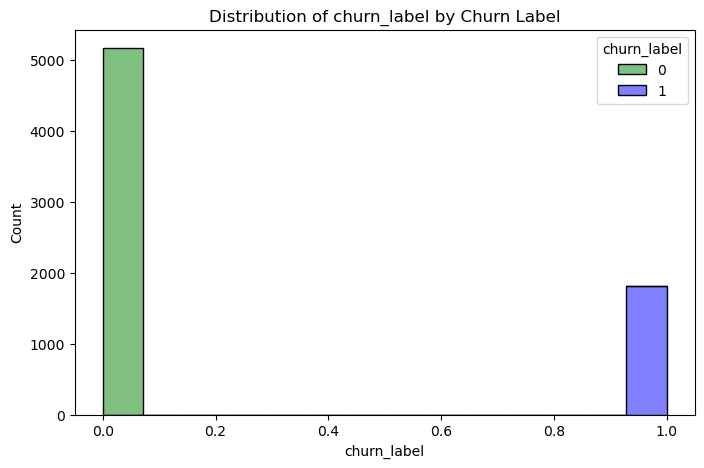

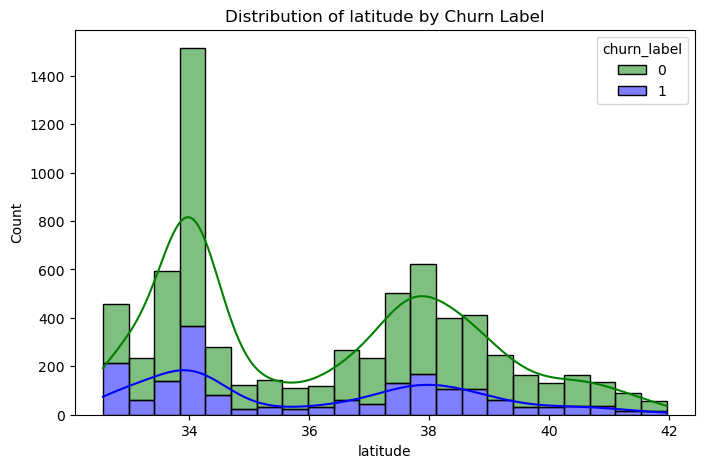

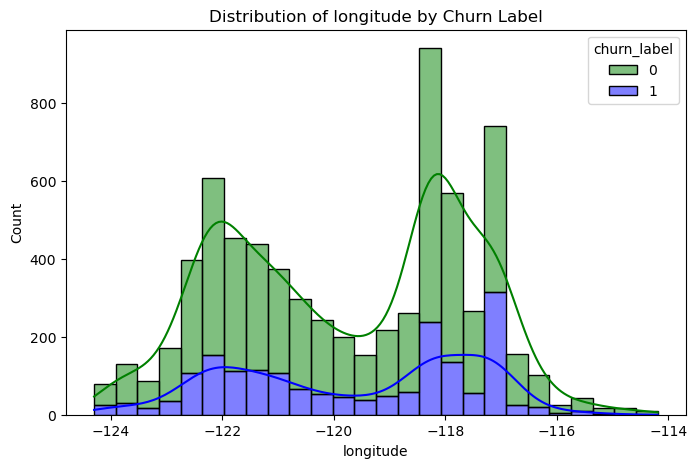

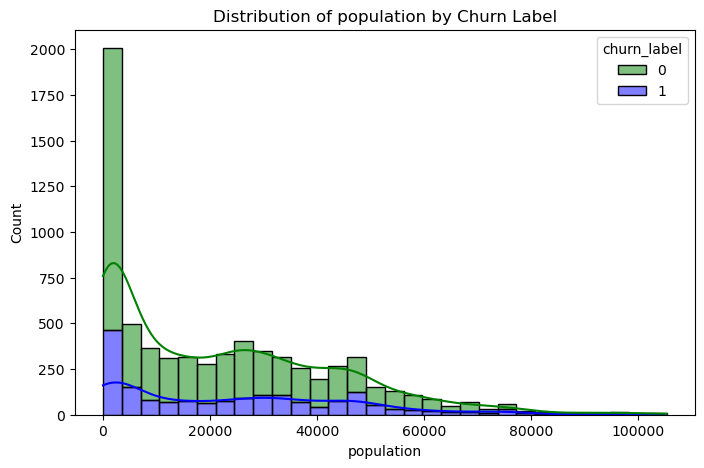

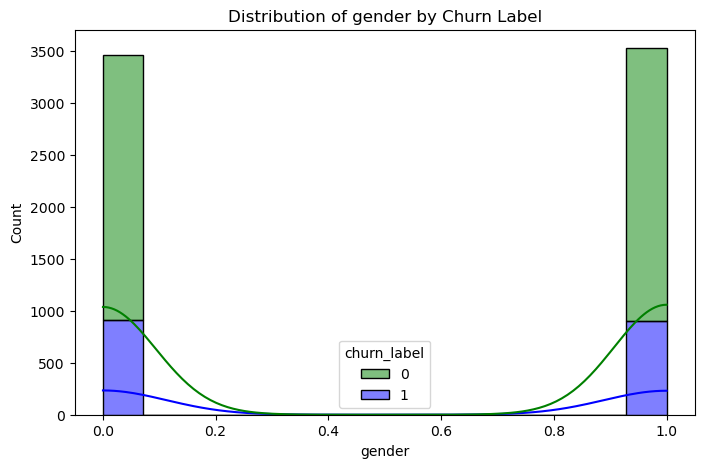

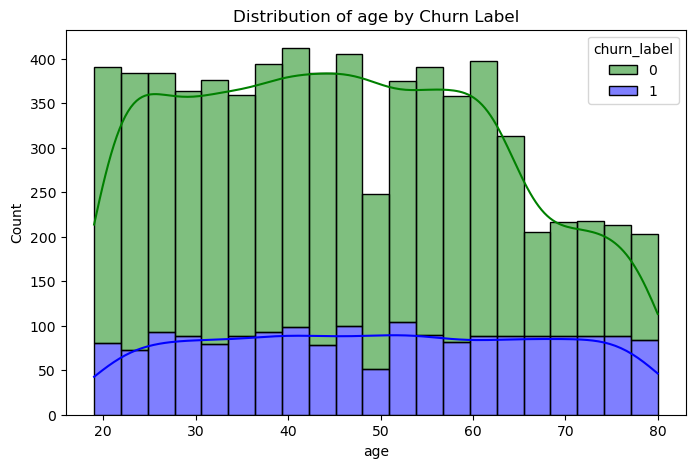

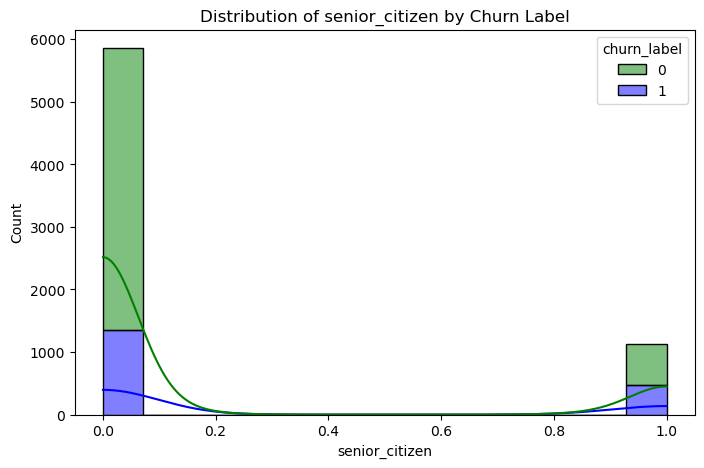

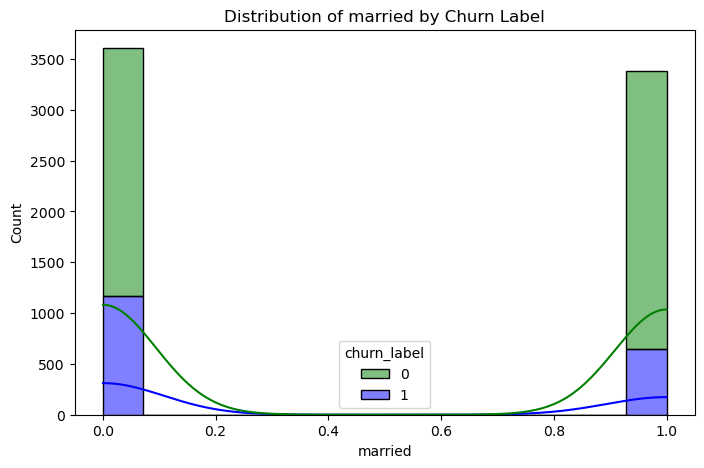

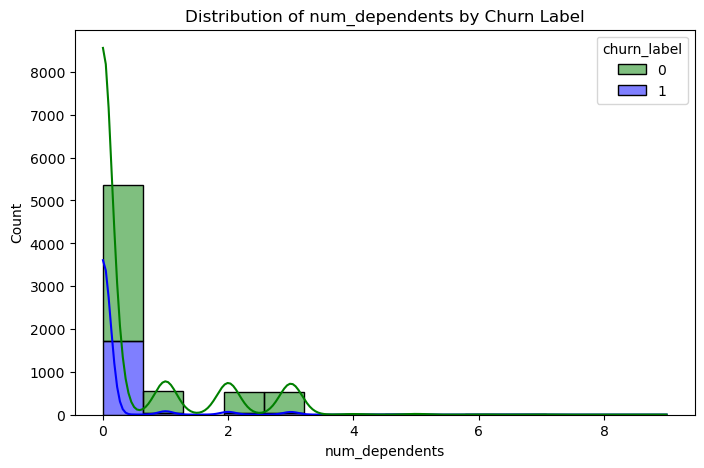

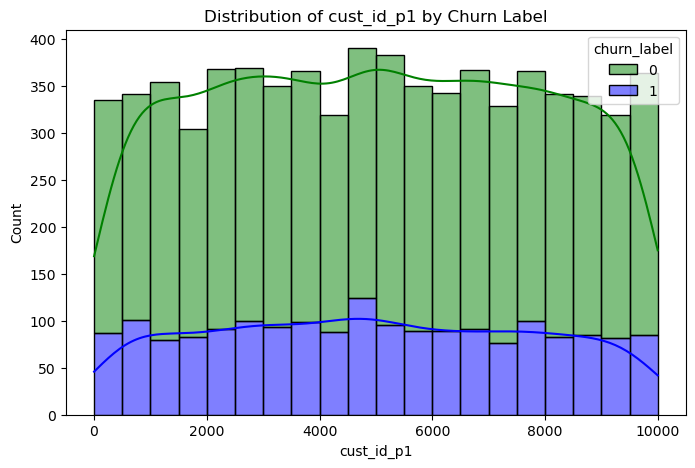

In [10]:
# 2. EXPLORATORY DATA ANALYSIS DATA VISUALIZATION & FEATURE ENGINEERING
# ----------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of numerical/continuous variables, with churn_label differentiation
num_ft = clean_cust_churn_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_ft:
    plt.figure(figsize=(8, 5))
    sns.histplot(clean_cust_churn_df, x=col, hue='churn_label', palette = {1: 'blue', 0: 'green'}, kde=True, multiple="stack")
    plt.title(f'Distribution of {col} by Churn Label')
    plt.show()

# Audience Takeaways -----------------------------------------------------------------
# Majority persona
    # Not a senior citizen 
    # Has 0 kids
# Majority behavior
    # Has not made a referral
    # Has internet service, unlimited data, phone service, paperless billing
    # Streams TV, movies, music
    # Pays ~$20 each month
    # Stays with the company
    # No charges made against
    # No request for refunds 
    # No premium tech support or online security
    # No online backup or device protection
    # No long distance calling
    # No heavy downloads through mobile data
    #Tenure months distributed across extremes
# Those who ... are unlikely to leave
    # > 5 months of tenure
    # Made 2 or more referrals
    # > $500 total long distance fee
    # > $500 total charges by quarter
    # > 1 dependent
# Remove these columns as they are not adding much value    
    # Customer ID - no drastic difference between early vs late joiners
    # Gender is proportionately distributed

<Figure size 1000x600 with 0 Axes>

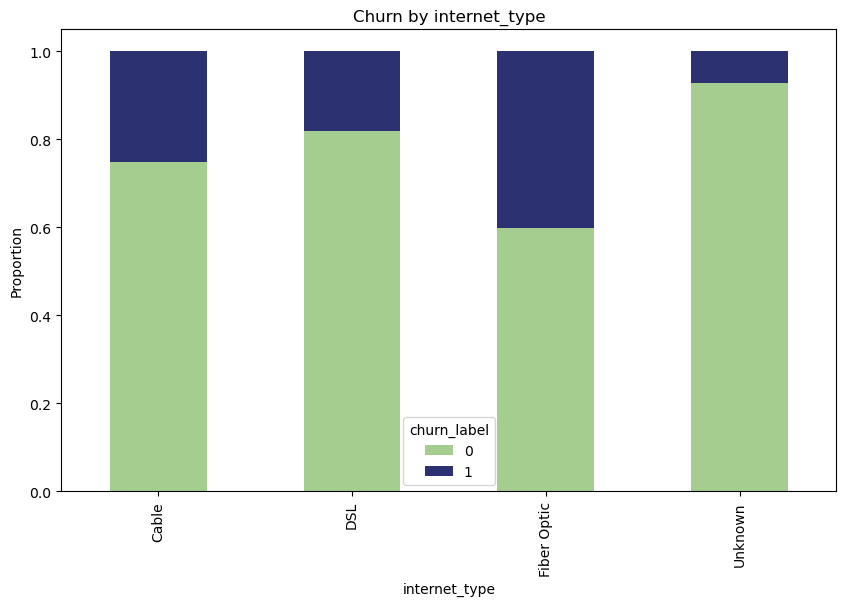

<Figure size 1000x600 with 0 Axes>

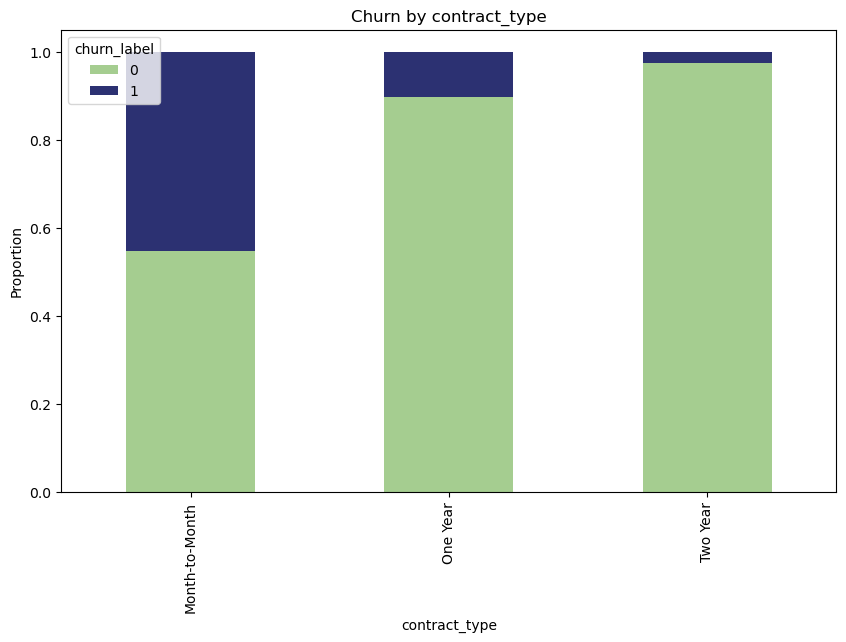

<Figure size 1000x600 with 0 Axes>

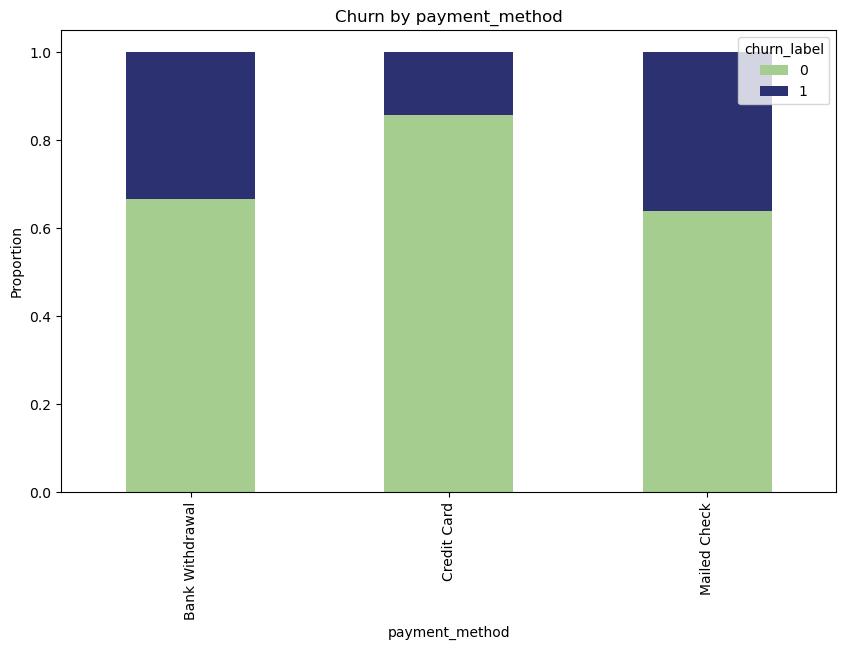

In [11]:
# Distribution of categorical features
# ['internet_type', 'contract_type', 'payment_method']

def plot_cat_rs(df, cat_ft, target_ft):
    """
    Loops through categorical variables and plots their relationship with the target variable.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    cat_ft (list): List of categorical variable column names.
    target_ft (str): Name of the target variable.
    """
    for ft in cat_ft:
        plt.figure(figsize=(10, 6))
        pd.crosstab(df[ft], df[target_ft], normalize='index').plot(
            kind='bar', stacked=True, figsize=(10, 6), colormap='crest'
        )
        plt.title(f"Churn by {ft}")
        plt.xlabel(ft)
        plt.ylabel("Proportion")
        plt.legend(title=target_ft)
        plt.show()

cat_ft_partial = ['internet_type', 'contract_type', 'payment_method']
plot_cat_rs(clean_cust_churn_df, cat_ft_partial, 'churn_label')

# Takeaways -----------------------------------------------------------------
    # internet_type - Fibre Optic customers more likely to leave
    # contract_type - Month-to-month contract customers more likely to leave
    # payment_method - Bank withdrawal/ mailed check customers more likely to leave

In [12]:
# Distribution of geographical features
# ['area_id', 'zip_code', 'city', 'acc_id_p1', 'acc_id_p2', 'cust_id_p2']

import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

def plot_geo_rs(df, lat_col, lon_col, cat_col, churn_col, map_title="Geographical Churn Distribution", top_n=10):
    """
    Plots categorical data on a map using latitude and longitude, color-coded by churn status.
    Highlights the top N areas with the highest churn.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the geographical data.
    lat_col (str): Column name for latitude.
    lon_col (str): Column name for longitude.
    cat_col (str): Categorical variable (e.g., area_id) to display on the map.
    churn_col (str): Column name for churn status (binary: 0 or 1).
    map_title (str): Title for the map.
    top_n (int): Number of top churn areas to highlight.

    Returns:
    folium.Map: Interactive map with churn-colored data points and highlighted top churn areas.
    """
    
    # Calculate churn count per area
    churn_counts = df[df[churn_col] == 1].groupby(cat_col)[churn_col].count()
    
    # Get the top N areas with the highest churn counts
    top_areas = churn_counts.nlargest(top_n).index.tolist()
    
    print(f"Top Churn Area IDs: {top_areas}")
    
    # Filter the dataframe to only include the top N areas
    df_top_areas = df[df[cat_col].isin(top_areas)]

    # Define map centered around the average latitude and longitude
    map_center = [df[lat_col].mean(), df[lon_col].mean()]
    map_obj = folium.Map(location=map_center, zoom_start=6)

    # Define churn color mapping
    churn_colors = {
        1: "red",    # High churn (1) -> Red
        0: "green"   # No churn (0) -> Green
    }

    # Marker cluster to group points
    marker_cluster = MarkerCluster().add_to(map_obj)

    # Plot all churned customer locations
    for _, row in df.iterrows():
        churn_status = row[churn_col]
        marker_color = churn_colors.get(churn_status, "blue")  # Default to blue if unknown
        popup_info = f"{cat_col}: {row[cat_col]}<br>Churn: {churn_status}<br>Lat: {row[lat_col]}, Lon: {row[lon_col]}"
        
        folium.Marker(
            location=[row[lat_col], row[lon_col]],
            popup=popup_info,
            tooltip=row[cat_col],
            icon=folium.Icon(color=marker_color)
        ).add_to(marker_cluster)
    
    # Mark Top N Areas with Distinct Icons
    for area in top_areas:
        area_data = df_top_areas[df_top_areas[cat_col] == area]
        center_lat, center_lon = area_data[lat_col].mean(), area_data[lon_col].mean()

        folium.Marker(
            location=[center_lat, center_lon],
            popup=f"Top Churn Area: {area}",
            tooltip=f"Area {area} (High Churn)",
            icon=folium.Icon(color="red", icon="glyphicon glyphicon-flag")
        ).add_to(map_obj)
    
    return map_obj

# Generate the map
area_id_map = plot_geo_rs(clean_cust_churn_df, "latitude", "longitude", "area_id", "churn_label", "Churn by Area ID", top_n=10)
area_id_map.save("geo_churn_top10_areaid.html")  
IFrame("geo_churn_top10_areaid.html", width=700, height=500)

# Takeaway -----------------------------------------------------------------
# San Diego has highest churn

Top Churn Area IDs: ['370', '365', '373', '325', '358', '377', '521', '369', '324', '376']


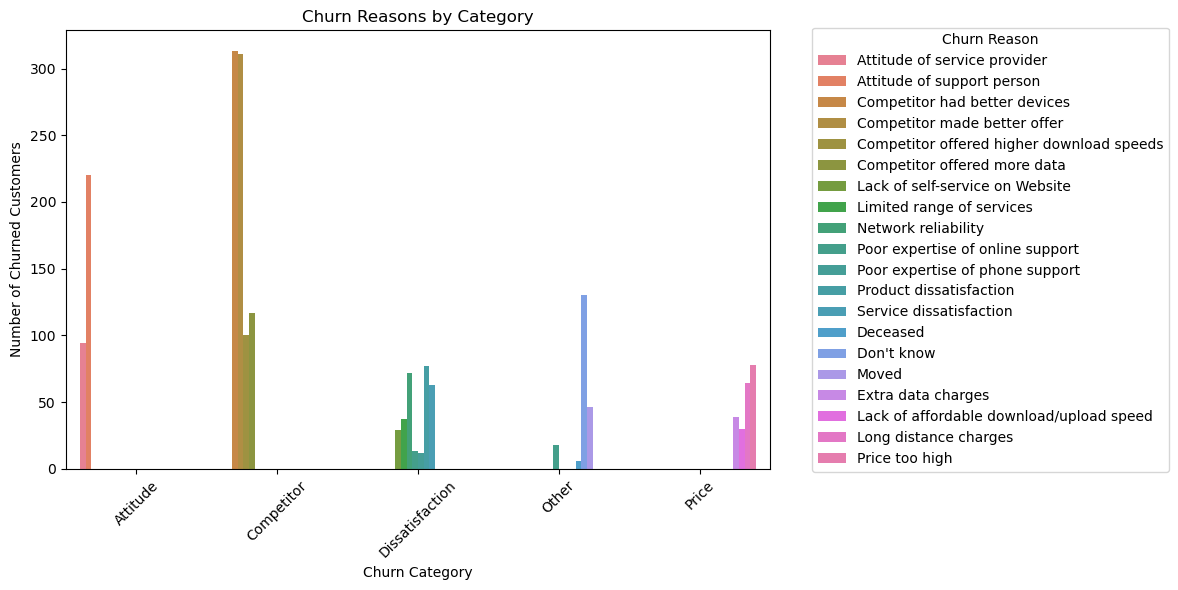

In [13]:
# Distribution of Churn Category and Reason
import matplotlib.pyplot as plt
import seaborn as sns

cust_churn_df["churn_category"] = cust_churn_df["churn_category"].fillna("Unknown")
cust_churn_df["churn_label"] = pd.to_numeric(cust_churn_df["churn_label"], errors="coerce")

# Identify top churn categories and reasons
top_categories = cust_churn_df.groupby("churn_category")["churn_label"].sum().nlargest(10).index.tolist()

# Filter the dataset for top churn categories
df_top_categories = cust_churn_df[cust_churn_df["churn_category"].isin(top_categories)]

# Group by churn_category, churn_reason, and count occurrences
churn_summary = df_top_categories.groupby(["churn_category", "churn_reason"]).size().reset_index(name="count")

# Plotting the visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=churn_summary, x="churn_category", y="count", hue="churn_reason")
plt.xlabel("Churn Category")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Reasons by Category")
plt.xticks(rotation=45)

# Move the legend to the side
plt.legend(title="Churn Reason", bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Takeaways -----------------------------------------------------------------
# Competitor had better devices and made better offer as top two reasons of why customers leave

In [14]:
clean_cust_churn_df.head()

,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,churn_label,area_id,zip_code,city,latitude,longitude,population,gender,age,senior_citizen,married,num_dependents,acc_id_p1,acc_id_p2,cust_id_p1,cust_id_p2
0,3,3,1,Fiber Optic,1,1,0,1,0,0,0,Month-to-Month,1,Credit Card,7.38,22.14,11,1,0,0,83.90,267.40,0.0,1,607,93010,Camarillo,34.227846,-119.079903,42853,0,75,1,1,0,BFIN,DLMOA,13,EXCHZ
1,63,8,1,Fiber Optic,0,1,1,1,1,0,0,Two Year,1,Credit Card,12.96,816.48,7,0,0,0,84.65,5377.80,0.0,0,963,94558,Napa,38.489789,-122.270110,63947,1,52,0,1,0,AFEO,XOOCP,14,BMAQU
2,65,3,1,Cable,1,1,1,1,1,1,1,Two Year,1,Credit Card,28.46,1849.90,14,1,1,1,90.45,5957.90,0.0,0,1390,95681,Sheridan,38.984756,-121.345074,1219,0,43,0,1,1,DEMQ,MFXWC,16,QLJIS
3,72,0,1,Fiber Optic,1,1,1,0,1,1,1,Two Year,1,Bank Withdrawal,2.25,162.00,16,1,0,0,101.30,7261.25,0.0,0,303,91942,La Mesa,32.782501,-117.016110,24005,0,32,0,0,0,AIPP,VTDXJ,19,EFAEP
4,56,0,1,DSL,1,0,0,1,1,1,1,Two Year,0,Bank Withdrawal,0.00,0.00,19,0,0,0,45.05,2560.10,0.0,0,716,93441,Los Olivos,34.704340,-120.026090,1317,0,39,0,0,0,CJHA,SRKIB,19,GFNTW


In [15]:
# 3. FEATURE ENGINEERING
# ----------------------------------------------------------------------------------
def clean_data_r2(df):
    """
    Cleans the dataset by:
    - Removing unnecessary identification columns: 'cust_id_p1', 'cust_id_p2', 'acc_id_p1', 'acc_id_p2', 'gender'
    - Removing unnecesary geographical columns: 'zip_code', 'city', 'latitude', 'longitude', 'population'
    - Handling missing values (optional)
    - Converting data types if necessary

    Parameters:
    - df: DataFrame containing the raw data
    
    Returns:
    - df: Cleaned DataFrame
    """
    # Drop specified columns
    columns_to_drop = ['cust_id_p1', 'cust_id_p2', 'acc_id_p1', 'acc_id_p2', 'gender','zip_code', 'city', 'latitude', 'longitude', 'population']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Optionally handle missing values (impute or drop)
    df = df.dropna()  # You can change this to impute missing values instead

    df = df.drop(columns=columns_to_drop, errors='ignore')  # Avoids errors if a column isn't present
    return df

clean_cust_churn_df_2 = clean_data_r2(clean_cust_churn_df)

In [16]:
def eng_data_r1(df):
    """
    Engineers the dataset by:
    - Encoding 'contract_type' using ordinal encoding:
        * 'Two Year' = 0 (least likely to churn)
        * 'One Year' = 1
        * 'Month-to-Month' = 2 (most likely to churn)
    - Creating 'not_credit_card' column (1 if payment method is NOT 'Credit Card', else 0).
    - Creating 'stream_type_count' (Total number of streaming services used).
    - Calculating 'total_services', 'total_basic_services', and 'total_premium_services'.
    - Creating 'is_top_churn_area' (1 if area_id is in a high-churn area list, else 0).
    - Dropping unnecessary columns after aggregation.
    - One-hot encoding the 'internet_type' column.
    
    Parameters:
    - df: DataFrame containing the raw data
    
    Returns:
    - df: DataFrame with new engineered features
    """

    # Ordinal encoding for contract type (higher value = more likely to churn)
    contract_mapping = {'Two Year': 0, 'One Year': 1, 'Month-to-Month': 2}
    df['contract_type_encoded'] = df['contract_type'].map(contract_mapping).fillna(2).astype(int)

    # Drop original contract_type column
    df.drop(columns=['contract_type'], inplace=True, errors='ignore')

    # Binary column for payment method
    df['not_credit_card'] = (df['payment_method'] != 'Credit Card').astype(int)

    # Drop original payment_method column
    df.drop(columns=['payment_method'], inplace=True, errors='ignore')

    # Streaming service count
    df['stream_type_count'] = df[['stream_tv', 'stream_movie', 'stream_music']].sum(axis=1)

    # Drop original streaming service columns
    df.drop(columns=['stream_tv', 'stream_movie', 'stream_music'], inplace=True, errors='ignore')

    # Define service groups - distribution is modelled after exploratory analysis in which basic services represent the majority of customers
    basic_services = ['has_internet_service', 'has_phone_service', 'has_unlimited_data']
    premium_services = ['has_multiple_lines','has_premium_tech_support', 'has_online_security', 'has_online_backup', 'has_device_protection']

    # Aggregating service counts
    df['total_basic_services'] = df[basic_services].sum(axis=1)
    df['total_premium_services'] = df[premium_services].sum(axis=1)

    # Drop original service columns
    df.drop(columns=basic_services + premium_services, inplace=True, errors='ignore')

    # One-hot encode the 'internet_type' column
    # df = df[df['internet_type'] != 'Unknown'] Previously identified highly correlated feature pair but didn't improve the accuracy score when removed
    df = pd.get_dummies(df, columns=['internet_type'], drop_first=True)
    
    # Mark high-churn areas
    high_churn_areas = {'370', '365', '373', '325', '358', '377', '521', '369', '324', '376'}
    df['area_id'] = df['area_id'].astype(str)  # Explicit conversion to string
    df['is_top_churn_area'] = df['area_id'].isin(high_churn_areas).astype(int)

    return df

# Apply transformation
eng_clean_cust_churn_df = eng_data_r1(clean_cust_churn_df_2)

In [17]:
eng_clean_cust_churn_df.head()

,tenure_months,num_referrals,paperless_billing,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,total_monthly_fee,total_charges_quarter,total_refunds,churn_label,area_id,age,senior_citizen,married,num_dependents,contract_type_encoded,not_credit_card,stream_type_count,total_basic_services,total_premium_services,internet_type_DSL,internet_type_Fiber Optic,internet_type_Unknown,is_top_churn_area
0,3,3,1,7.38,22.14,11,83.90,267.40,0.0,1,607,75,1,1,0,2,0,1,3,1,False,True,False,0
1,63,8,1,12.96,816.48,7,84.65,5377.80,0.0,0,963,52,0,1,0,0,0,0,2,3,False,True,False,0
2,65,3,1,28.46,1849.90,14,90.45,5957.90,0.0,0,1390,43,0,1,1,0,0,3,3,5,False,False,False,0
3,72,0,1,2.25,162.00,16,101.30,7261.25,0.0,0,303,32,0,0,0,0,1,1,3,4,False,True,False,0
4,56,0,0,0.00,0.00,19,45.05,2560.10,0.0,0,716,39,0,0,0,0,1,0,2,4,True,False,False,0


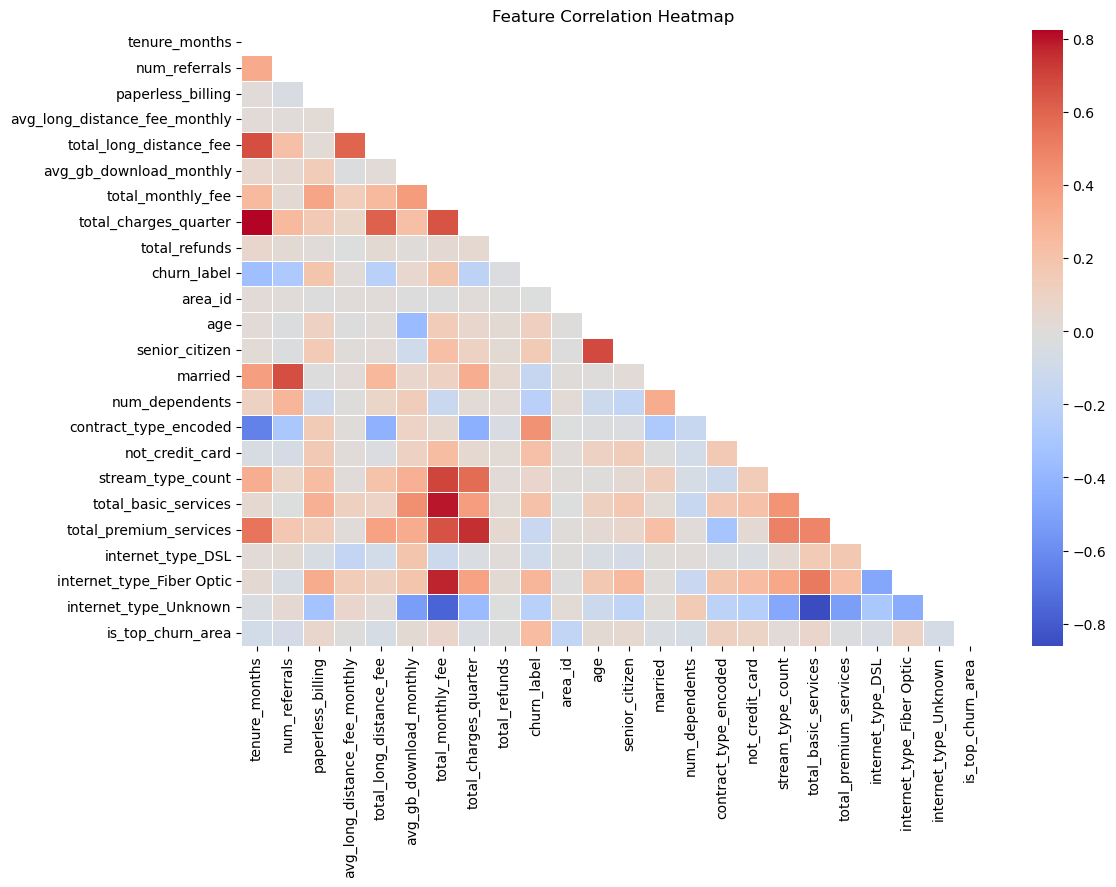

Highly Correlated Feature Pairs:
total_basic_services - internet_type_Unknown: -0.86
tenure_months - total_charges_quarter: 0.83
total_monthly_fee - total_basic_services: 0.79
total_monthly_fee - internet_type_Fiber Optic: 0.77
total_monthly_fee - internet_type_Unknown: -0.76
total_charges_quarter - total_premium_services: 0.75


In [23]:
import numpy as np

# Compute correlation matrix - use iteratively to prune so all feature correlation < 0.85
# Previously identified highly correlated feature pair
# total_premium_services - total_services: 0.93
# total_basic_services - internet_type_Unknown: -0.86

corr_matrix = eng_clean_cust_churn_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (threshold: 0.85)
corr_threshold = 0.7
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Upper triangle

# Extract feature pairs with high correlation
high_corr_pairs = [(col1, col2, corr_pairs.loc[col1, col2]) 
                   for col1 in corr_pairs.columns for col2 in corr_pairs.index 
                   if abs(corr_pairs.loc[col1, col2]) > corr_threshold]

# Sort by absolute correlation value
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Print results
print("Highly Correlated Feature Pairs:")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} - {col2}: {corr_value:.2f}")

In [25]:
# 4. MODEL TRAINING, EVALUATION, TUNING
# ----------------------------------------------------------------------------------
# Splitting the train_df and test_df and capturing the results
X_train, X_test, y_train, y_test = split_features_target(eng_clean_cust_churn_df)

cat_ft_1 = list((eng_clean_cust_churn_df.select_dtypes(include=['object', 'category']).columns))
# ['internet_type', 'area_id']

# Instantiate the CatBoostClassifier and specify categorical features
cb1_model = CatBoostClassifier(
    iterations=1000,          # Number of boosting iterations
    learning_rate=0.1,        # Step size shrinkage
    depth=6,                  # Depth of the tree
    random_seed=5,            # Ensures reproducibility
    verbose=100,              # Prints progress every 100 iterations
    cat_features=cat_ft_1  # Specify which features are categorical
)

# Fit the model with the training data
cb1_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cb1_model.predict(X_test)

# Calculate the accuracy score
cb1_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy_score for catboost_model with feature engineering: ', cb1_accuracy)

print(classification_report(y_test, y_pred))
cb1_auc_score = roc_auc_score(y_test, cb1_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {cb1_auc_score}')

0:	learn: 0.6170832	total: 47.1ms	remaining: 47s
100:	learn: 0.2488378	total: 443ms	remaining: 3.94s
200:	learn: 0.1970219	total: 812ms	remaining: 3.23s
300:	learn: 0.1575714	total: 1.18s	remaining: 2.74s
400:	learn: 0.1282454	total: 1.54s	remaining: 2.31s
500:	learn: 0.1060560	total: 1.91s	remaining: 1.9s
600:	learn: 0.0889505	total: 2.29s	remaining: 1.52s
700:	learn: 0.0747840	total: 2.67s	remaining: 1.14s
800:	learn: 0.0632232	total: 3.04s	remaining: 755ms
900:	learn: 0.0548086	total: 3.41s	remaining: 375ms
999:	learn: 0.0477634	total: 3.78s	remaining: 0us

Accuracy_score for catboost_model with feature engineering:  0.8393708293612965
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1536
           1       0.72      0.65      0.68       562

    accuracy                           0.84      2098
   macro avg       0.80      0.78      0.79      2098
weighted avg       0.83      0.84      0.84      2098

ROC AUC: 0.892807495551601

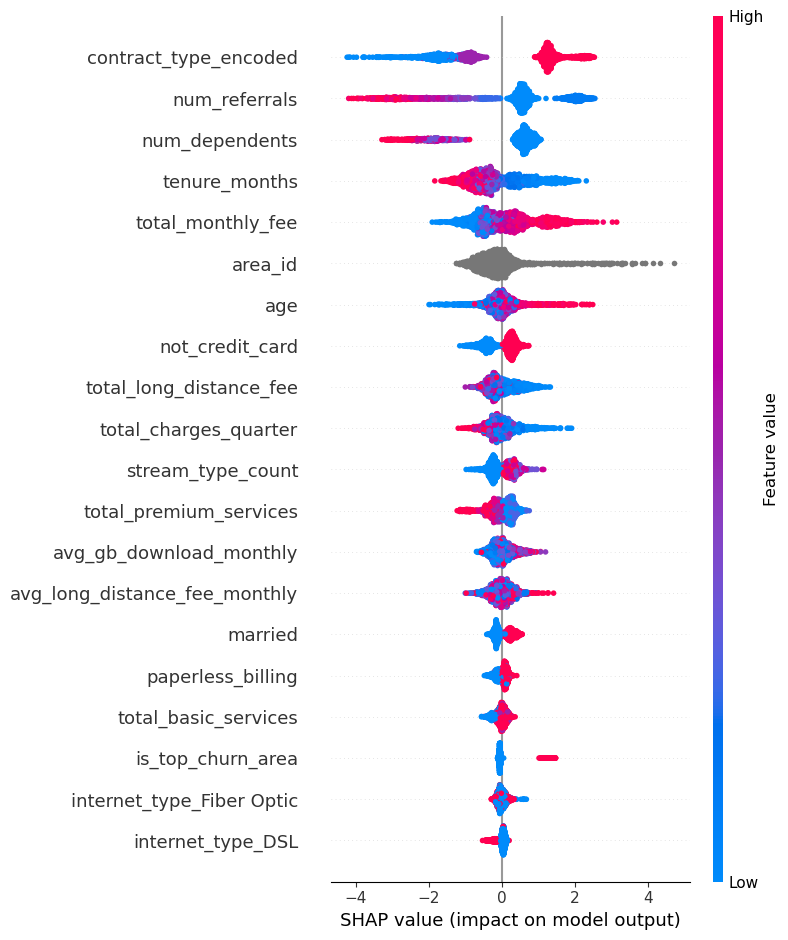

Selected Features: ['tenure_months', 'num_referrals', 'total_monthly_fee', 'area_id', 'num_dependents', 'contract_type_encoded']


In [29]:
# Finetune features ----------------------------------------------------------------
import shap

# Create the SHAP explainer
explainer = shap.Explainer(cb1_model)

# Get SHAP values
shap_values = explainer(X_test)

# Visualizing SHAP values
shap.summary_plot(shap_values, X_test)

# Remove columns through SHAP value ------------------------------------------------
# Check if shap_values is an Explanation object
if hasattr(shap_values, "values"):
    shap_values_array = shap_values.values  # Extract SHAP values array
else:
    shap_values_array = shap_values  # Assume it's already a NumPy array

# Calculate mean absolute SHAP values for each feature
shap_importance = pd.DataFrame({
    'feature': X_train.columns,
    'mean_abs_shap': np.abs(shap_values_array).mean(axis=0)
})

# Set a threshold and filter features
threshold = shap_importance['mean_abs_shap'].mean()
eng_ft = shap_importance[shap_importance['mean_abs_shap'] > threshold]['feature']

# Output selected features
print("Selected Features:", list(eng_ft))

In [34]:
# Use Shap Selected Features and added age and payment method
shap_ft = ['tenure_months', 'num_referrals', 'total_monthly_fee', 'area_id', 'num_dependents', 'contract_type_encoded', 'churn_label', 'age', 'not_credit_card']
eng_clean_cust_churn_df_2 = eng_clean_cust_churn_df[shap_ft]

#  Splitting the train_df and test_df and capturing the results
X_train, X_test, y_train, y_test = split_features_target(eng_clean_cust_churn_df_2)

cat_ft_2 = list((eng_clean_cust_churn_df_2.select_dtypes(include=['object', 'category']).columns))
# ['area_id']

# Instantiate the CatBoostClassifier and specify categorical features
cb2_model = CatBoostClassifier(
    iterations=1000,          # Number of boosting iterations
    learning_rate=0.1,        # Step size shrinkage
    depth=6,                  # Depth of the tree
    random_seed=5,            # Ensures reproducibility
    verbose=100,              # Prints progress every 100 iterations
    cat_features=cat_ft_2  # Specify which features are categorical
)

# Fit the model with the training data
cb2_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cb2_model.predict(X_test)

# Calculate the accuracy score
cb2_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy_score for catboost_model with feature engineering: ', cb2_accuracy)

print(classification_report(y_test, y_pred))
cb2_auc_score = roc_auc_score(y_test, cb2_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {cb2_auc_score}')

0:	learn: 0.6070857	total: 6.38ms	remaining: 6.38s
100:	learn: 0.2675225	total: 293ms	remaining: 2.6s
200:	learn: 0.2245787	total: 576ms	remaining: 2.29s
300:	learn: 0.1917176	total: 866ms	remaining: 2.01s
400:	learn: 0.1657430	total: 1.16s	remaining: 1.73s
500:	learn: 0.1453789	total: 1.44s	remaining: 1.44s
600:	learn: 0.1290976	total: 1.73s	remaining: 1.15s
700:	learn: 0.1143390	total: 2.02s	remaining: 862ms
800:	learn: 0.1019141	total: 2.31s	remaining: 573ms
900:	learn: 0.0906217	total: 2.59s	remaining: 285ms
999:	learn: 0.0814585	total: 2.87s	remaining: 0us

Accuracy_score for catboost_model with feature engineering:  0.8317445185891325
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1536
           1       0.72      0.61      0.66       562

    accuracy                           0.83      2098
   macro avg       0.79      0.76      0.77      2098
weighted avg       0.83      0.83      0.83      2098

ROC AUC: 0.8903319154062

In [39]:
# Logistic Regression Comparison

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Pipeline for Logistic Regression (scaling + model)
lr0_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lr', LogisticRegression(random_state=5, max_iter=1000))  # Logistic Regression
])

# Train the model
lr0_model.fit(X_train, y_train)

# Predict
y_pred_lr0 = lr0_model.predict(X_test)

# Evaluate
lr0_accuracy = accuracy_score(y_test, y_pred_lr0)
lr0_auc = roc_auc_score(y_test, lr0_model.predict_proba(X_test)[:, 1])

print('\nAccuracy for Logistic Regression:', lr0_accuracy)
print(classification_report(y_test, y_pred_lr0))
print(f'ROC AUC: {lr0_auc}')


Accuracy for Logistic Regression: 0.8088655862726406
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1536
           1       0.66      0.60      0.63       562

    accuracy                           0.81      2098
   macro avg       0.76      0.74      0.75      2098
weighted avg       0.80      0.81      0.81      2098

ROC AUC: 0.8696549710854092


In [41]:
# Random Forest Comparison

from sklearn.ensemble import RandomForestClassifier

# Instantiate and train Random Forest
rf0_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=5)
rf0_model.fit(X_train, y_train)

# Predict
y_pred_rf0 = rf0_model.predict(X_test)

# Evaluate
rf0_accuracy = accuracy_score(y_test, y_pred_rf0)
rf0_auc = roc_auc_score(y_test, rf0_model.predict_proba(X_test)[:, 1])

print('\nAccuracy for Random Forest:', rf0_accuracy)
print(classification_report(y_test, y_pred_rf0))
print(f'ROC AUC: {rf0_auc}')


Accuracy for Random Forest: 0.834604385128694
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1536
           1       0.74      0.60      0.66       562

    accuracy                           0.83      2098
   macro avg       0.80      0.76      0.78      2098
weighted avg       0.83      0.83      0.83      2098

ROC AUC: 0.899039887307236


In [44]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def kfold_cross_val(model, X, y, n_splits=10, random_state=5):
    """
    Perform K-Fold cross-validation and return performance metrics.

    Parameters:
    - model: The machine learning model to train (e.g., XGBClassifier, RandomForestClassifier).
    - X: Feature matrix (pandas DataFrame or NumPy array).
    - y: Target vector (pandas Series or NumPy array).
    - n_splits: Number of K-Folds (default: 10).
    - random_state: Random seed for reproducibility (default: 5).

    Returns:
    - mean_accuracy: Mean accuracy across folds.
    - std_dev: Standard deviation of accuracy.
    - variance: Variance of accuracy.
    """
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold_accuracies = []  # Store accuracy for each fold

    for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
        print(f"\nFold {fold + 1}")

        # Split data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train model
        model.fit(X_train, y_train)

        # Predict & evaluate
        y_pred = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy_test)

        print(f"Accuracy for fold {fold + 1}: {accuracy_test:.4f}")

    # Compute overall metrics
    mean_accuracy = np.mean(fold_accuracies)
    std_dev = np.std(fold_accuracies)
    variance = np.var(fold_accuracies)

    print(f"\nMean K-Fold Accuracy: {mean_accuracy:.4f}")
    print(f"Standard Deviation: {std_dev:.4f}")
    print(f"Variance of Accuracy: {variance:.4f}")

    return mean_accuracy, std_dev, variance

# Run K-Fold Cross-Validation
print("\n----- CatBoost K-Fold Results -----")
cb2_mean_acc, cb2_std_dev, cb2_var = kfold_cross_val(cb2_model, X, y)

print("\n----- Random Forest K-Fold Results -----")
rb0_mean_acc, rb0_std_dev, rb0_var = kfold_cross_val(rb0_model, X, y)

# Compare Results
print("\n========== Model Comparison ==========")
print(f"CatBoost Mean Accuracy: {cb2_mean_acc:.4f}, Std Dev: {cb2_std_dev:.4f}, Variance: {cb2_var:.4f}")
print(f"Random Forest Mean Accuracy: {rb0_mean_acc:.4f}, Std Dev: {rb0_std_dev:.4f}, Variance: {rb0_var:.4f}")

# Identify the best model based on mean accuracy
best_model = "CatBoost" if cb2_mean_acc > rb0_mean_acc else "Random Forest"
print(f"\n🔥 Best Model: {best_model} 🔥")


----- CatBoost K-Fold Results -----


NameError: name 'X' is not defined

In [ ]:
# # 3. CATEGORICAL VARIABLES - grade, sub_grade, home_ownership, issue_d, purpose, earliest_cr_line, application_type
# # ----------------------------------------------------------------------------------
# # Distribution of loan_status across grades ----------------------------------------
# pd.crosstab(clean_train_df['grade'], clean_train_df['loan_status'], normalize='index').plot(
#     kind='bar', stacked=True, figsize=(10, 6), colormap='crest')
# plt.title("Loans by Grade")  # Adjusted title
# plt.xlabel("Grade")
# plt.ylabel("Proportion")
# plt.show()

# # A grade is best, G grade likely results in loan default

# # Distribution of loan_status across grade / sub_grade ------------------------------
# subgrade_means = clean_train_df.groupby('sub_grade')['int_rate'].mean().sort_index()
# subgrade_means.plot(kind='line', marker='o')
# plt.title("Average Interest Rate by Sub Grade")
# plt.xlabel("Sub Grade")
# plt.ylabel("Interest Rate (%)")
# plt.show()

# # Interest rate is highest for worst grade

# # Distribution of loan_status across home_ownership ------------------------------
# pd.crosstab(clean_train_df['home_ownership'], clean_train_df['loan_status'], normalize='index').plot(
#     kind='bar', stacked=True, figsize=(10, 6), colormap='crest')
# plt.title("Stacked Loan Status by Grade")
# plt.xlabel("Grade")
# plt.ylabel("Proportion")
# plt.show()

# # No clear ordinal relationship between home ownership -> opt for one-hot encoding

# # Distribution of loan_status across issue_d -------------------------------------
# clean_train_df['issue_d'] = pd.to_datetime(clean_train_df['issue_d'])

# clean_train_df['issue_y'] = clean_train_df['issue_d'].dt.year  # Ensure datetime format
# clean_train_df.drop(['issue_d'], axis=1, inplace=True)

# issue_trend = 1 - clean_train_df.groupby('issue_y')['loan_status'].mean()
# issue_trend.plot(kind='line', figsize=(10, 6), marker='o')
# plt.title("Trend of Fully Paid Loans Over Time")
# plt.xlabel("Issue Year")
# plt.ylabel("Proportion of Fully Paid Loans")
# plt.show()

# # 2014 + 2015 seem like exceptions - might need to account for macroeconmic features

# # Distribution of loan_status across purpose --------------------------------------

# # Create the crosstab for the stacked bar chart
# crosstab_data = pd.crosstab(clean_train_df['purpose'], clean_train_df['loan_status'], normalize='index')

# # Plot the stacked bar chart
# ax = crosstab_data.plot(
#     kind='bar', 
#     stacked=True, 
#     figsize=(10, 6), 
#     colormap='crest'
# )

# # Add a title and rotate the x-ticks
# plt.title("Stacked Loan Status by Purpose")
# plt.xticks(rotation=45)

# # Annotate each bar with its proportion
# for i, bar_group in enumerate(ax.containers):  # Iterate over the bar containers
#     for bar in bar_group:
#         height = bar.get_height()  # Get the height of the current bar
#         if height > 0:  # Annotate only if the bar has a height
#             ax.text(
#                 bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
#                 bar.get_y() + height / 2,  # Y-coordinate: center of the stacked section
#                 f"{height:.2%}",  # Format as percentage
#                 ha='center', va='center', fontsize=9, color='black'
#             )

# # Show the plot
# plt.show()

# # Small business -> highest chance of defaulting on loan, form of domain knowledge? introduce weights?

# # Distribution of loan_status across application_type ------------------------------
# sns.countplot(data=clean_train_df, x='application_type', hue='loan_status', palette='crest')
# plt.title("Loan Status by Application Type")
# plt.show()

# pd.crosstab(clean_train_df['application_type'], clean_train_df['loan_status'], normalize='index').plot(
#     kind='bar', stacked=True, figsize=(10, 6), colormap='crest')
# plt.title("Paid Loans by Application Type")
# plt.xticks(rotation=45)
# plt.show()

# # Can explore an ordinal relationship, joint > individual > direct_pay -> label encoding

In [ ]:
# 5. MODEL EXPORT
# ----------------------------------------------------------------------------------


In [ ]:
# def handle_bad_dtypes(df):
#     # List of categorical columns that should remain as 'object' dtype
#     categorical_columns = ['internet_type', 'contract_type', 'payment_method', 
#                            'area_id', 'zip_code', 'city', 'gender', 
#                            'acc_id_p1', 'acc_id_p2', 'cust_id_p2']

#     # Convert categorical columns to 'category' dtype
#     for col in categorical_columns:
#         if col in df.columns:
#             df[col] = df[col].astype('category')

#     # Convert other columns to numeric if possible
#     for col in df.columns:
#         if df[col].dtype == 'object' and col not in categorical_columns:
#             # Try converting columns to numeric (if appropriate)
#             df[col] = pd.to_numeric(df[col], errors='ignore')
    
#     return df

# # Apply this function to your dataframe
# clean_cust_churn_df = handle_bad_dtypes(clean_cust_churn_df)
# clean_cust_churn_df.head(10)

# # List of categorical columns that you've identified
# categorical_columns = ['internet_type', 'contract_type', 'payment_method', 
#                        'area_id', 'zip_code', 'city', 'gender', 
#                        'acc_id_p1', 'acc_id_p2', 'cust_id_p2']


In [ ]:
# 2.1 DATA VISUALISATION


In [ ]:
# import lightgbm as lgb

# # Initialize the model
# lgb_model = lgb.LGBMClassifier(
#     boosting_type='gbdt',
#     objective='binary',
#     metric='auc',
#     n_estimators=500,
#     learning_rate=0.05,
#     num_leaves=31,
#     random_state=42
# )

# # Fit the model, passing categorical columns as a list of column indices or names
# lgb_model.fit(X_train, y_train, categorical_feature=categorical_columns)

# # Make predictions on the test set
# y_pred = lgb_model.predict(X_test)
# y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Get probability for ROC-AUC

# # Calculate the accuracy score
# from sklearn.metrics import accuracy_score, roc_auc_score
# lgb_accuracy = accuracy_score(y_test, y_pred)
# lgb_auc_score = roc_auc_score(y_test, y_pred_proba)

# print(f'Accuracy: {lgb_accuracy:.4f}')
# print(f'AUC Score: {lgb_auc_score:.4f}')


In [ ]:
# # Save the model
# import joblib

# joblib.dump(cb0_model, 'cb0_model.pkl')

# from pathlib import Path

# # Path("../model").mkdir(exist_ok=True)  # Create model/ directory if doesn't exist

# import joblib

# joblib.dump(model, '../model/catboost_model.pkl')